In [2]:
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Dense, Input
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten
from keras import backend as k


# train test split

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()


# data normalization

In [5]:
img_rows, img_cols=28, 28

if k.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    inpx = (1, img_rows, img_cols)

else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    inpx = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255


In [6]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)


# neural networks

In [7]:
inpx = Input(shape=inpx)
layer1 = Conv2D(32, kernel_size=(3, 3), activation='relu')(inpx)
layer2 = Conv2D(64, (3, 3), activation='relu')(layer1)
layer3 = MaxPooling2D(pool_size=(3, 3))(layer2)
layer4 = Dropout(0.5)(layer3)
layer5 = Flatten()(layer4)
layer6 = Dense(250, activation='sigmoid')(layer5)
layer7 = Dense(10, activation='softmax')(layer6)


# model fit and compile

In [9]:
model = Model([inpx], layer7)
model.compile(optimizer='adam',
			loss=keras.losses.categorical_crossentropy,
			metrics=['accuracy'])

model.fit(x_train, y_train, epochs=12, batch_size=500)


Epoch 1/12
120/120 [==============================] - 6s 46ms/step - loss: 0.9045 - accuracy: 0.7448
Epoch 2/12
120/120 [==============================] - 6s 47ms/step - loss: 0.1389 - accuracy: 0.9601
Epoch 3/12
120/120 [==============================] - 6s 47ms/step - loss: 0.0821 - accuracy: 0.9774
Epoch 4/12
120/120 [==============================] - 6s 47ms/step - loss: 0.0632 - accuracy: 0.9819
Epoch 5/12
120/120 [==============================] - 6s 47ms/step - loss: 0.0515 - accuracy: 0.9852
Epoch 6/12
120/120 [==============================] - 6s 47ms/step - loss: 0.0443 - accuracy: 0.9868
Epoch 7/12
120/120 [==============================] - 6s 47ms/step - loss: 0.0360 - accuracy: 0.9902
Epoch 8/12
120/120 [==============================] - 6s 47ms/step - loss: 0.0337 - accuracy: 0.9904
Epoch 9/12
120/120 [==============================] - 6s 47ms/step - loss: 0.0293 - accuracy: 0.9924
Epoch 10/12
120/120 [==============================] - 6s 47ms/step - loss: 0.0259 - accura

# Test data score

In [10]:
score = model.evaluate(x_test, y_test, verbose=0)
print('loss=', score[0])
print('accuracy=', score[1])


loss= 0.02614622749388218
accuracy= 0.9921000003814697


# train data score

In [11]:
score=model.evaluate(x_train,y_train)
print('loss=', score[0])
print('accuracy=', score[1])


1875/1875 [==============================] - 22s 11ms/step - loss: 0.0102 - accuracy: 0.9979
loss= 0.010242386721074581
accuracy= 0.9978500008583069


# visualisation of pridicting image

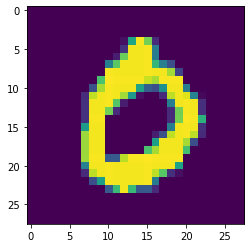

In [14]:
import matplotlib.pyplot as plt
plt.imshow(x_test[3])
plt.show()

# pridicting(testing the model)

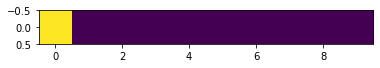

In [15]:
plt.imshow(model.predict(x_test[3].reshape(1,28,28,1)))
plt.show()